From the beginning, since the first printed newspaper, every news that makes into a page has had a specific section allotted to it. Although pretty much everything changed in newspapers from the ink to the type of paper used, this proper categorization of news was carried over by generations and even to the digital versions of the newspaper. Newspaper articles are not limited to a few topics or subjects, it covers a wide range of interests from politics to sports to movies and so on. For long, this process of sectioning was done manually by people but now technology can do it without much effort. In this hackathon, Data Science and Machine Learning enthusiasts like you will use Natural Language Processing to predict which genre or category a piece of news will fall in to from the story.

# FEATURES:

## STORY:  A part of the main content of the article to be published as a piece of news.
## SECTION: The genre/category the STORY falls in.

There are four distinct sections where each story may fall in to. The Sections are labelled as follows :

* Politics: 0
* Technology: 1
* Entertainment: 2
* Business: 3

# Importing  Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Importing Data

In [2]:
train_data = pd.read_csv(r"C:\Users\Kedar Joshi\Capstone_Projects\Predict News Category\TrainDataset.csv")
test_data = pd.read_csv(r"C:\Users\Kedar Joshi\Capstone_Projects\Predict News Category\TestDataset.csv")

In [3]:
train_data.head()

,STORY,SECTION
0,The roadshow and the filing of nomination pape...,0
1,These vulnerabilities could have allowed hacke...,1
2,"""People will now be able to include music in t...",1
3,Jersey is expected to have a good start at the...,2
4,Xiaomi’s unveiling also hints at how Samsung i...,1


In [4]:
test_data.head()

,STORY
0,Privileged to have done this candid and COMPLE...
1,6) Some analysts expect volatility to remain h...
2,There is no stopping Marvel Cinematic Universe...
3,"According to Ravi Menon, analyst at Elara Secu..."
4,"A complaint against Nadiadwala, known for prod..."


# Exploratory Data Analysis

In [5]:
#Columns in the train data
train_data.columns

Index(['STORY', 'SECTION'], dtype='object')

In [6]:
#Columns in the test data
test_data.columns

Index(['STORY'], dtype='object')

In [7]:
#finding Nulls in the train data
train_data.isnull().sum()

STORY      0
SECTION    0
dtype: int64

In [8]:
#finding Nulls in the test data
test_data.isnull().sum()

STORY    0
dtype: int64

In [9]:
#More information about the data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6102 entries, 0 to 6101
Data columns (total 2 columns):
STORY      6102 non-null object
SECTION    6102 non-null int64
dtypes: int64(1), object(1)
memory usage: 95.4+ KB


In [10]:
#Describing the Dataset
train_data.describe()

,SECTION
count,6102.000000
mean,1.362012
std,1.001336
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,3.000000


In [11]:
train_data.groupby("SECTION").describe()

STORY                                                               
        count unique                                                top freq
SECTION                                                                     
0        1341   1333  This story has been published from a wire agen...    4
1        2224   2196  This story has been published from a wire agen...   13
2        1524   1515  The consensus reads, “Exciting, entertaining, ...    3
3        1013   1004  This story has been published from a wire agen...    8

# Data Visualization

In [12]:
import warnings
warnings.filterwarnings("ignore")

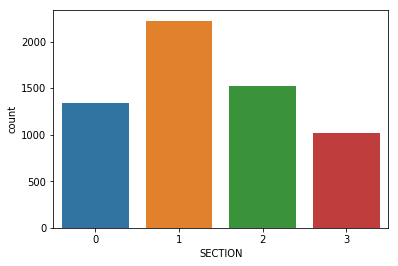

In [13]:
sns.countplot(x = 'SECTION', data = train_data)
plt.show()

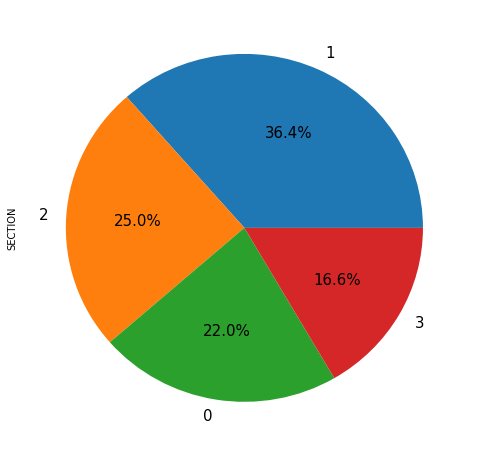

In [14]:
train_data.SECTION.value_counts().plot(kind='pie', figsize=(8, 8), fontsize=15, autopct='%1.1f%%')
plt.show()

### We can see that news on Technologies are more compared to other 3 categories

# Data Preprocessing

In [15]:
import nltk
from nltk.corpus import stopwords
import string

In [16]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\Kedar
[nltk_data]     Joshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Kedar
[nltk_data]     Joshi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
# remove duplicates

train_data.drop_duplicates(inplace = True)

In [18]:
all_punctuations = string.punctuation + '‘’,:”][],' 

In [19]:
# Remove punctuation

def punc_remover(raw_text):
    no_punct = "".join([i for i in raw_text if i not in all_punctuations])
    return no_punct

In [20]:
# Remove stop words

def stopword_remover(no_punc_text):
    words = no_punc_text.split()
    no_stp_words = " ".join([i for i in words if i not in stopwords.words('english')])
    return no_stp_words

In [21]:
# lemmatize the words in the data

lemmer = nltk.stem.WordNetLemmatizer()
def lem(words):
    return " ".join([lemmer.lemmatize(word,'v') for word in words.split()])

In [22]:
# perform a complete cleaning

def text_cleaner(raw):
    cleaned_text = stopword_remover(punc_remover(raw))
    return lem(cleaned_text)

In [23]:
# Testing 

text_cleaner("Hi!, this is a sample text to test the text cleaner method. Removes *@!#special characters%$^* and stopwords. And lemmatizes, go, going - run, ran, running")

'Hi sample text test text cleaner method Removes special character stopwords And lemmatizes go go run run run'

In [24]:
# Apply the cleaner method to the entire train dataset

train_data['CLEAN_STORY'] = train_data['STORY'].apply(text_cleaner)

In [25]:
# Apply the cleaner method to the entire test dataset

test_data['CLEAN_STORY'] = test_data['STORY'].apply(text_cleaner)

In [26]:
print(train_data.values)

[['The roadshow and the filing of nomination papers are also an attempt to show the strength of the ruling BJP in the eastern UP region, as several ministers and allies of the party are in Varanasi for the filing of nomination, expected on Friday.\n\n\nBJP won 17 of the 18 Lok Sabha seats in the region in 2014, losing only Azamgarh to Samajwadi Party patriarch Mulayam Singh Yadav. It repeated the performance in the 2017 assembly polls, when it returned to power in Uttar Pradesh after a gap of 15 years.\n\n\nBJP leaders said Modi visits Varanasi every few months and meets its residents. In the last five years, he had been to Varanasi at least 30 times, they said.\n\n\nFinance minister Arun Jaitley tweeted that Modi’s roadshow that culminated with the customary Ganga aarti, “expresses only one indication"—that the PM “is well on the way of repeating or even increasing the 2014 victory margin".'
  0
  'The roadshow file nomination paper also attempt show strength rule BJP eastern UP regio

In [27]:
print(test_data.values)

[['Privileged to have done this candid and COMPLETELY NON POLITICAL freewheeling conversation with our PM @narendramodi,” Kumar wrote on the microblogging site\n\n\nModi replied to the tweet, saying, “Dear @akshaykumar, it was good talking to you about everything, except politics and elections :) I’m sure people would like watching our conversation'
  'Privileged do candid COMPLETELY NON POLITICAL freewheel conversation PM narendramodi Kumar write microblogging site Modi reply tweet say “Dear akshaykumar good talk everything except politics elections Im sure people would like watch conversation']
 ['6) Some analysts expect volatility to remain high in the near term. Sahaj Agrawal, head of research for derivatives at Kotak Securities, said: "After a strong rally seen in the recent past, Nifty currently is in a consolidation phase. Tech parameters suggest possibility of extended consolidation before the upmove resumes. We continue to believe the bias remains positive."\n\n\n7) On the dow

In [28]:
train_data.head()

,STORY,SECTION,CLEAN_STORY
0,The roadshow and the filing of nomination pape...,0,The roadshow file nomination paper also attemp...
1,These vulnerabilities could have allowed hacke...,1,These vulnerabilities could allow hackers acce...
2,"""People will now be able to include music in t...",1,People able include music videos Facebook Inst...
3,Jersey is expected to have a good start at the...,2,Jersey expect good start box office attention ...
4,Xiaomi’s unveiling also hints at how Samsung i...,1,Xiaomis unveil also hint Samsung start lose po...


In [29]:
test_data.head()

,STORY,CLEAN_STORY
0,Privileged to have done this candid and COMPLE...,Privileged do candid COMPLETELY NON POLITICAL ...
1,6) Some analysts expect volatility to remain h...,6 Some analysts expect volatility remain high ...
2,There is no stopping Marvel Cinematic Universe...,There stop Marvel Cinematic Universes latest o...
3,"According to Ravi Menon, analyst at Elara Secu...",According Ravi Menon analyst Elara Securities ...
4,"A complaint against Nadiadwala, known for prod...",A complaint Nadiadwala know produce hit Hindi ...


## Count Vectors and TF-IDF Vectors

In [190]:
from sklearn.feature_extraction.text import TfidfTransformer

In [191]:
from sklearn.feature_extraction.text import CountVectorizer

In [192]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [193]:
count_vectorizer = CountVectorizer()

In [194]:
tfidf_trans = TfidfTransformer()

In [195]:
vectorizer = TfidfVectorizer(sublinear_tf = True ,min_df = 5 ,norm = 'max',ngram_range = (1,2),stop_words = 'english')

In [196]:
train_df = vectorizer.fit_transform(train_data.CLEAN_STORY).toarray()

In [197]:
train_df

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [198]:
test = test_data['CLEAN_STORY']

In [199]:
test_df = vectorizer.fit_transform(test).toarray()

In [200]:
test_df

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [201]:
print(train.shape)

(6048, 31561)


In [202]:
print(test.shape)

(1526,)


# Train-Test-Split

In [203]:
from sklearn.model_selection import train_test_split

In [204]:
x = train_data['CLEAN_STORY']

In [205]:
y = train_data['SECTION']

In [206]:
x_train , x_test ,y_train , y_test = train_test_split(x, y ,test_size = 0.2 ,random_state = 0) 

In [207]:
x_train.shape ,x_test.shape

((4838,), (1210,))

In [208]:
y_train.shape , y_test.shape

((4838,), (1210,))

In [209]:
data = count_vectorizer.fit_transform(x_train)

In [210]:
x_train_tfidf = tfidf_trans.fit_transform(data)

# Model Building

# 1. Logistic Regression 

In [211]:
from sklearn.linear_model import LogisticRegression

In [212]:
log = LogisticRegression()

In [213]:
log.fit(x_train_tfidf,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [214]:
x_test_tfidf =  count_vectorizer.transform(x_test)

In [215]:
y_pred = log.predict(x_test_tfidf)

In [216]:
y_pred

array([0, 0, 0, ..., 1, 1, 2], dtype=int64)

In [217]:
from sklearn.metrics import classification_report

In [218]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.90      0.97      0.94       261
          1       0.92      0.98      0.95       456
          2       0.99      0.83      0.91       290
          3       0.97      0.96      0.97       203

avg / total       0.94      0.94      0.94      1210



In [256]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(log , x_test_tfidf ,y_pred , scoring = 'accuracy' , cv =9)
print(" Mean accuracy of the model is " , np.mean(score)*100)

 Mean accuracy of the model is  94.45886509481576


In [226]:
from sklearn.metrics import confusion_matrix

In [227]:
print(confusion_matrix(y_test,y_pred))

[[253   6   1   1]
 [  5 447   1   3]
 [ 21  26 242   1]
 [  1   8   0 194]]


### Checking the model for actual Test data

In [220]:
test_final = count_vectorizer.transform(test)

In [221]:
y_pred_final = log.predict(test_final)

In [222]:
y_pred_final

array([0, 3, 1, ..., 1, 0, 2], dtype=int64)

In [223]:
sample_submission = pd.DataFrame({'SECTION':y_pred_final})

In [225]:
sample_submission.to_csv('LogisticReg_Prediction.csv',index = False)

# 2. DECISION TREE

In [230]:
from sklearn.tree import DecisionTreeClassifier

In [231]:
des = DecisionTreeClassifier()

In [233]:
des.fit(x_train_tfidf, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [234]:
des_pred = des.predict(x_test_tfidf)

In [235]:
des_pred

array([3, 3, 1, ..., 1, 1, 2], dtype=int64)

In [236]:
print(classification_report(y_test,des_pred))

             precision    recall  f1-score   support

          0       0.82      0.72      0.77       261
          1       0.80      0.78      0.79       456
          2       0.83      0.85      0.84       290
          3       0.62      0.73      0.67       203

avg / total       0.78      0.78      0.78      1210



In [272]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(des , x_test_tfidf ,des_pred , scoring = 'accuracy' , cv =9)
print(" Mean accuracy of the model is " , np.mean(score)*100 )

 Mean accuracy of the model is  81.08815153135258


### It seems like, Decision tree gives less accuracy compared to the logistic regression so we won't consider this result. we will futher check the data with another models.

# 3. RANDOM FOREST

In [241]:
from sklearn.ensemble import RandomForestClassifier

In [242]:
ran = RandomForestClassifier(n_estimators=18)

In [243]:
ran.fit(x_train_tfidf, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=18, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [245]:
ran_pred = ran.predict(x_test_tfidf)

In [246]:
ran_pred

array([0, 0, 1, ..., 1, 1, 2], dtype=int64)

In [247]:
print(classification_report(y_test,ran_pred))

             precision    recall  f1-score   support

          0       0.96      0.92      0.94       261
          1       0.94      0.94      0.94       456
          2       0.91      0.96      0.93       290
          3       0.93      0.91      0.92       203

avg / total       0.94      0.94      0.94      1210



In [273]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(ran , x_test_tfidf ,ran_pred , scoring = 'accuracy' , cv =9)
print(" Mean accuracy of the model is " , np.mean(score)*100 )

 Mean accuracy of the model is  89.2670211211663


In [249]:
print(confusion_matrix(y_test,ran_pred))

[[239   8   8   6]
 [  4 430  15   7]
 [  3   8 279   0]
 [  3  10   6 184]]


### Checking the model for actual Test data

In [267]:
ran_pred_final = ran.predict(test_final)

In [251]:
ran_pred_final

array([0, 3, 2, ..., 1, 0, 2], dtype=int64)

In [252]:
sample_submission = pd.DataFrame({'SECTION':ran_pred_final})

In [253]:
sample_submission.to_csv('RandomForest_Prediction.csv',index = False)

# 4. SVM

In [259]:
from sklearn.svm import LinearSVC

In [260]:
svm = LinearSVC()

In [261]:
svm.fit(x_train_tfidf,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [262]:
svm_pred = svm.predict(x_test_tfidf)

In [263]:
svm_pred

array([0, 1, 0, ..., 1, 1, 2], dtype=int64)

In [264]:
print(classification_report(y_test,svm_pred))

             precision    recall  f1-score   support

          0       0.92      0.97      0.94       261
          1       0.95      0.99      0.97       456
          2       0.99      0.88      0.93       290
          3       0.98      0.98      0.98       203

avg / total       0.96      0.96      0.95      1210



In [274]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(svm , x_test_tfidf ,svm_pred , scoring = 'accuracy' , cv =9)
print(" Mean accuracy of the model is " , np.mean(score)*100 )

 Mean accuracy of the model is  92.96973825267598


In [266]:
print(confusion_matrix(y_test,svm_pred))

[[252   6   2   1]
 [  3 451   1   1]
 [ 18  16 254   2]
 [  0   4   0 199]]


### Checking the model for actual Test data

In [268]:
svm_pred_final = svm.predict(test_final)

In [269]:
svm_pred_final

array([0, 3, 1, ..., 1, 0, 2], dtype=int64)

In [270]:
sample_submission = pd.DataFrame({'SECTION':svm_pred_final})

In [271]:
sample_submission.to_csv('SVM_Prediction.csv',index = False)

### As a result we can say, Logistic regression is performing very good. Accuracy is almost 94.50%. Then SVM and Random Forest are also working quite well.